# 1. Import Library

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

import scipy.stats as stats

sns.set(style="whitegrid")

Yang pertama, kita mengimpor beberapa library Python yang dipakai dalam analisis.
- pandas → untuk mengolah data tabel (CSV).
- numpy → operasi matematika.
- matplotlib & seaborn → membuat grafik eksplorasi (EDA).
- plotly → membuat grafik interaktif.
- sklearn → membuat model regresi dan mengukur performanya (R², MSE, dll).
- statsmodels → membuat model OLS dan uji statistik lengkap.
- scipy.stats → untuk uji normalitas residual.

Library ini dipakai karena masing-masing punya fungsi berbeda:
pandas untuk baca data, seaborn buat visualisasi, sklearn untuk model, dan statsmodels untuk analisis statistiknya.

# 2. Load Data

In [12]:
df = pd.read_csv("white_wine_clean.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Dataset ini berisi:
- 11 variabel kimia (acidity, alcohol, sulphates, dll)
- 1 variabel target → quality

Dataset ini sudah bersih, tidak ada missing value, sehingga bisa langsung kita analisis.

# 3. Identifikasi Masalah

1.  Tujuan :
 - Memprediksi Kualitas Wine berdasarkan 11 variabel kimia
 - Membangun model regresi linear.
 - Menguji apakah model memenuhi asumsi statistik.
 - Mengevaluasi apakah regresi linear cocok atau perlu model lain.
2.  Metode : Regresi Linear
3.  Dataset: White Wine Quality Dataset (UCI)
4.  Perbandingan : Membandingkan dengan model lain
5.  Link : https://archive.ics.uci.edu/dataset/186/wine%2Bquality

# 4. EDA (Exploratory Data Analysist)

## 4.1 Info Data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## 4.2 Statistik Deskriptif

In [16]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- df.info() → menunjukkan tipe data dan tidak ada nilai kosong.
- df.describe() → memberi gambaran rata-rata, minimum, maksimum, dan distribusi nilai.

Langkah awal kita harus memahami struktur data. Kita lihat tipe variabel, apakah ada missing value, serta statistik dasarnya.

## 4.3 Cek Missing Value

In [18]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## 4.4 Distribusi Variabel

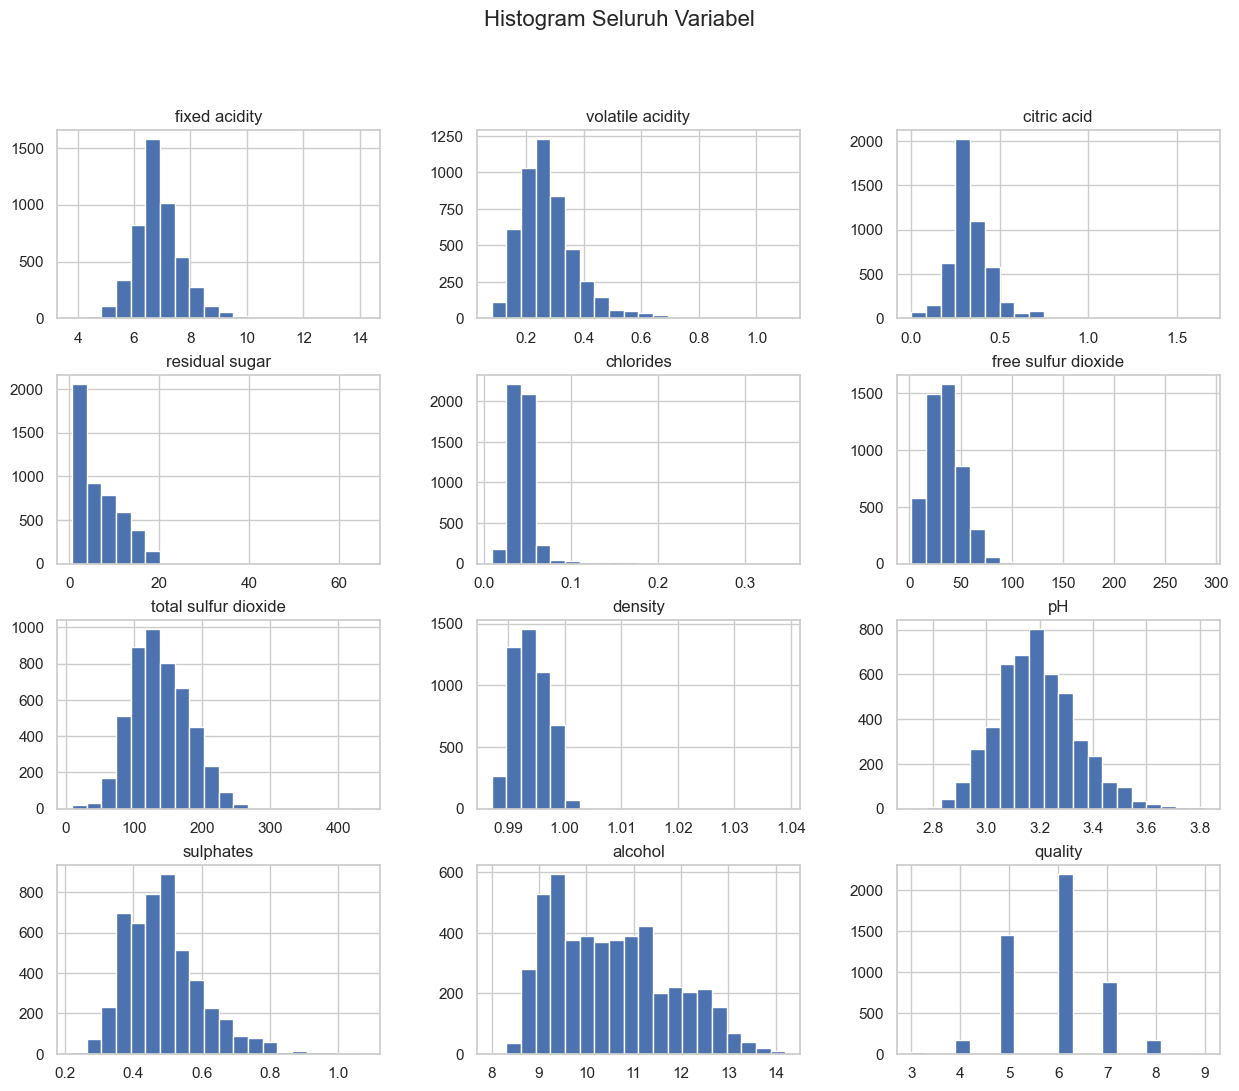

In [20]:
df.hist(figsize=(15, 12), bins=20)
plt.suptitle("Histogram Seluruh Variabel", fontsize=16)
plt.show()

Kita membuat histogram dari semua variabel, Kenapa histogram?. Karena histogram menunjukkan pola distribusi data, apakah:

- normal
- miring ke kanan/kiri
- ada outlier
- data rata atau mengumpul di titik tertentu

Tujuan histogram adalah memahami karakter setiap variabel sebelum masuk model.
Misalnya alcohol menyebar cukup normal, sementara total sulfur dioxide miring ke kanan (right-skewed).

## 4.5 Scatter plot terhadap quality

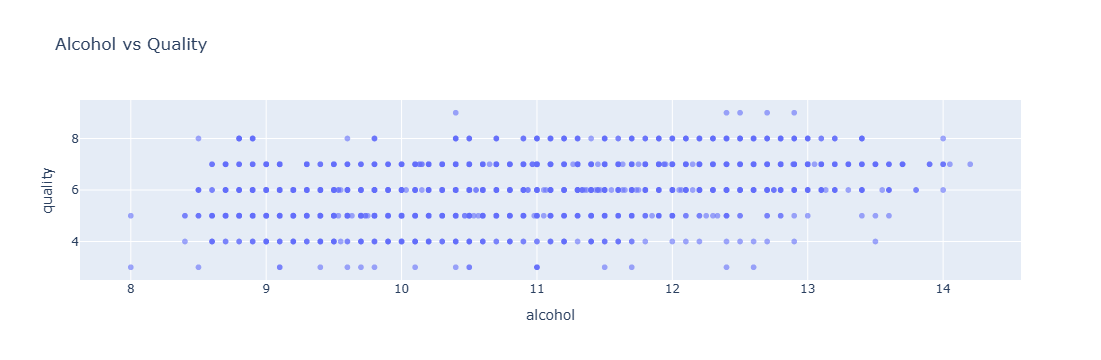

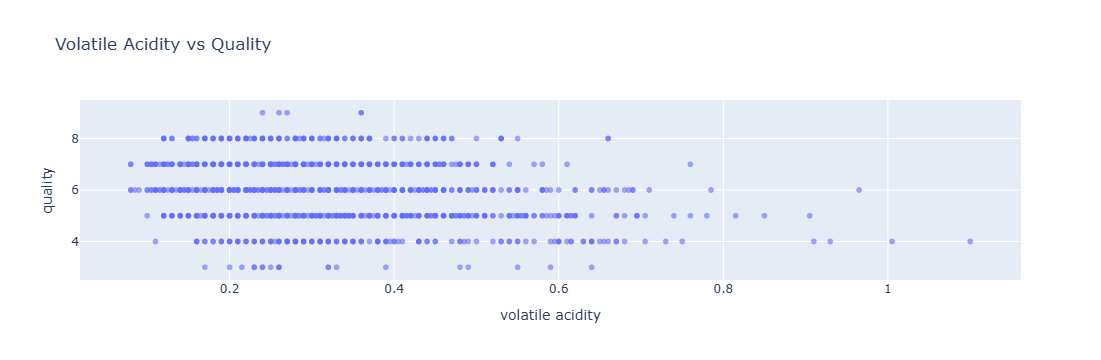

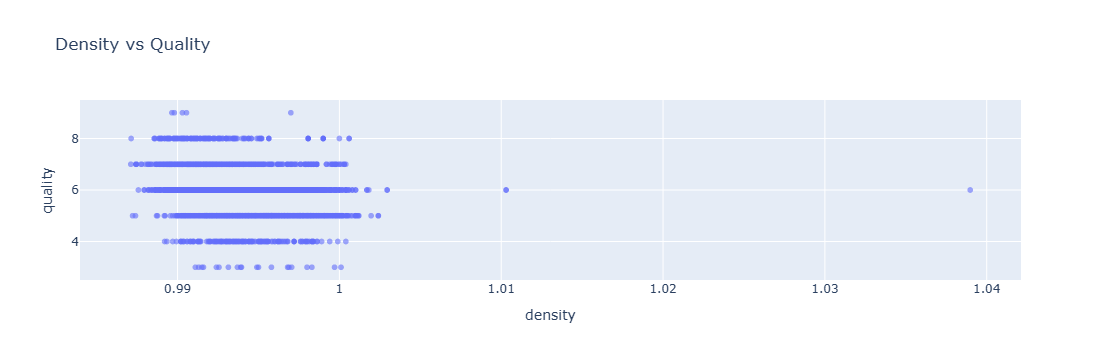

In [24]:
import plotly.express as px

# Alcohol
fig1 = px.scatter(df, x="alcohol", y="quality",
                  title="Alcohol vs Quality ",
                  opacity=0.6)
fig1.show()

# Volatile Acidity
fig2 = px.scatter(df, x="volatile acidity", y="quality",
                  title="Volatile Acidity vs Quality ",
                  opacity=0.6)
fig2.show()

# Density
fig3 = px.scatter(df, x="density", y="quality",
                  title="Density vs Quality ",
                  opacity=0.6)
fig3.show()

Kita juga membuat scatter interaktif untuk variabel:
- alcohol
- volatile acidity
- density

Fungsinya apa? Fungsinya melihat apakah ada hubungan linear antara variabel tersebut dan quality.

Contoh interpretasi:

- Alcohol + → Quality cenderung + → hubungan positif.
- Volatile acidity + → Quality - → hubungan negatif.
- Density cukup datar → hubungan lemah.

Scatter plot membantu melihat pola hubungan. Jika titik-titik naik teratur, artinya hubungan linear bagus. Jika acak, berarti lemah.

Kenapa Scatter Interaktif hanya untuk 3 variabel?

Scatter plot interaktif hanya ditampilkan untuk tiga variabel utama
(alcohol, volatile acidity, density) karena:
- Ketiganya memiliki korelasi tertinggi dengan quality.
- Scatter 11 variabel interaktif sangat berat untuk dijalankan (±54 ribu titik).
- Menampilkan seluruh scatter interaktif tidak efisien dan tidak menambah nilai analisis.

# 5. Heatmap Korelasi

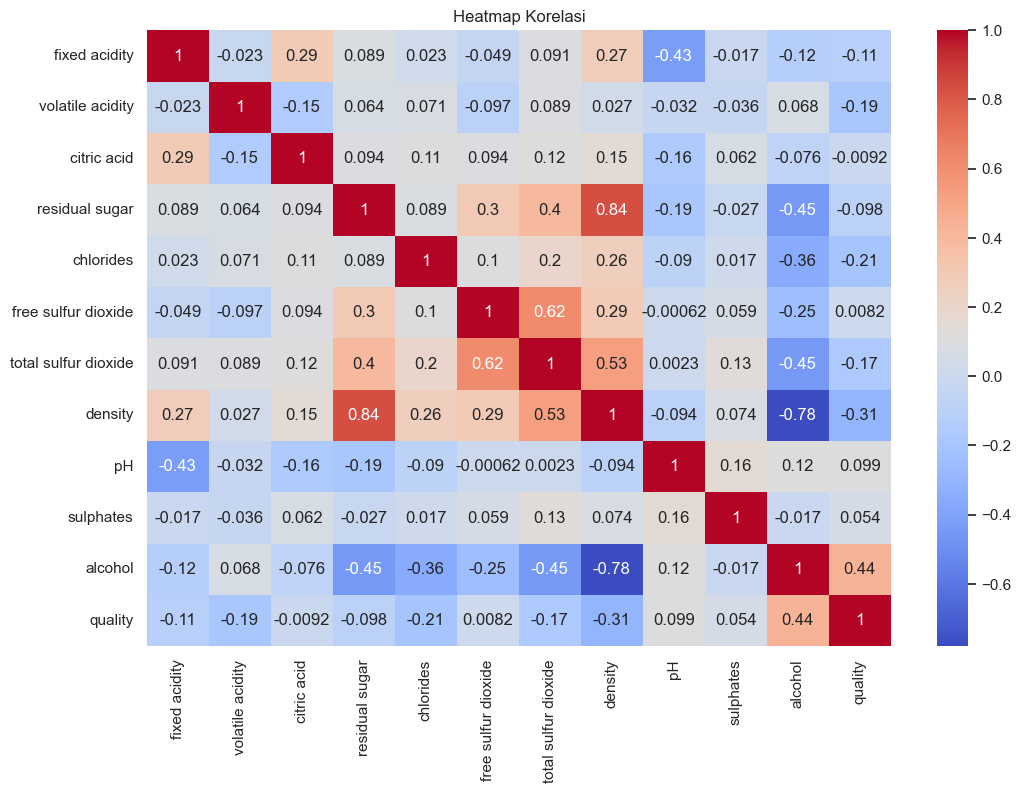

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

Heatmap korelasi adalah grafik yang menunjukan seberapa kuat hubungan antar variabel.
Setiap kotak berisi angka korelasi dari -1 sampai +1

- +1 = Hubungan sangat kuat dan searah
- -1 = Hubungan sangat kuat dan tapi berlawanan arah
-  0 = Tidak ada hubungan

Kenapa kita pakai Heatmap?

Karena kita punya 11 variabel, serta kita butuh tahu yang:

- mirip satu sama lain
- punya potensi untuk menjelaskan Quality
- dan apakah ada variabel yang terlalu mirip (multikolinearitas).

Jadi, apa yang terlihat di dataset White Wine?
- Beberapa variabel punya korelasi kecil dengan quality → artinya kualitas wine memang kompleks.
- Alcohol cenderung punya korelasi positif.
- Volatile acidity cenderung korelasi negatif.
- Ada variabel yg saling berkorelasi kuat, seperti density ↔ residual sugar.

Intinya:
Heatmap ini membantu kita memutuskan apakah regresi linear cocok, dan apakah ada masalah seperti multikolinearitas yang harus dicek nanti.

# 6. Model Regresi Linear

Pertanyaan : Apakah variabel kimia bisa memprediksi kualitas wine?

Rumus :

Quality = $$Konstanta + a1*x1 + a2*x2 + ... + a11*x11$$

Tujuannya:

- mengetahui variabel mana yang berpengaruh.
- seberapa besar pengaruhnya.
- dan apakah pengaruh tersebut signifikan.

## 6.1 Split Data

In [34]:
X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

Split data artinya kita membagi dataset menjadi dua bagian:

- Training (80%) → digunakan untuk melatih model
- Testing (20%) → digunakan untuk mengecek keakuratan model

Kenapa harus dipisah?

Agar model tidak “curang” atau menghafal data.
Kita ingin memastikan model bisa memprediksi data baru yang belum pernah dilihat.

Split data adalah langkah wajib dalam machine learning.

## 6.2 Statistika Models

In [48]:
X_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     135.7
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          1.17e-264
Time:                        22:54:46   Log-Likelihood:                -4458.0
No. Observations:                3918   AIC:                             8940.
Df Residuals:                    3906   BIC:                             9015.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  139.7223 

Setelah split data, kita bangun model regresi menggunakan OLS (Ordinary Least Squares).

**OLS mencari garis terbaik dengan cara:**

Mengurangi error antara prediksi dan data asli sampai sekecil mungkin.

1. Informasi Model (Bagian Tabel Atas)

   - Dep. Variabel : Quality
     
     Artinya model memprediksi kualitas wine (angka 0–10).
   - Method : OLS (Ordinary Least Squares)
     
     Ini metode standar untuk regresi linear.
   - No. Observations : 3918
     
     Total data yang digunakan 3918 baris.
   - R-squared = 0.276
     
     Model hanya bisa menjelaskan 27.6% variasi kualitas wine.

Ini berarti:
- kualitas wine tidak sepenuhnya bisa dijelaskan oleh 11 variabel kimia
- masih ada faktor lain: rasa, aroma, kualitas anggur, cara fermentasi, dll
  
R² rendah bukan masalah, karena data wine quality memang kompleks.



- Adj. R-squared = 0.274
  
  Ini versi R² yang sudah disesuaikan jumlah variabel. Nilainya hampir sama → tanda bahwa model tidak mengalami overfitting parah.
- F - statistic: 135.7 dan p - value  F - Statistics : 1.17e - 264

  Model Secara keseluruhan Signifkan

  Walaupun R² rendah, tetapi model tetap layak dan valid dipakai secara statistik.

2. Koefisien Setiap Variabel (Bagian Tengah Tabel)
   Ini tuh bagian terpenting. Jadi koefisien disini menjelaskan :
   - jika variabel naik 1, maka kualitas wine akan berubah

P-value menunjukkan apakah variabel itu berpengaruh secara signifikan.

Kita fokus variabel yang P-value < 0.05 (artinya signifikan).

### Interpretasi Variabel

1. Volatile acidity (koef = -1.858, p-value = 0.000)
   
   Jadi disini berpengaruh Negatif dan signifikan. Semakin tinggi volatile acidity (keasaman tajam), kualitas wine TURUN
2. Free sulfur dioxida (koef = 0.0039, p - value = 0.000)

   Berpengaruh positif, tapi lebih kecil. Sedikit sulfur bisa membantu menjaga kualitas wine, Tapi efeknya kecil sekali.

3. Density (koef = -139.4893, p - value = 0.000)

   Berpengaruh Negatif dan Sangat kuat. Wine yang lebih padat (lebih tebal) cenderung kualitasnya lebih rendah. menurut model, Ini juga masuk akal. Wine yang terlalu pekat biasanya kurang disukai.

4. pH (koef = 0.6351, p - value = 0.0000)

   Berpengaruh positif. pH yang sedikit lebih tinggi, kualitas wine naik. Wine dengan terlalu rendah pH sangat asam akan membuat kualitas turun.

5. Sulphates (koef = 0.6848, p - value = 0.0000)

   Berpengaruh Positif. Sulphates membantu stabilitas wine. Semakin tinggi sulphates, kualitas wine cenderung naik.

6. Alcohol (koef = 0.2002, p - value = 0.0000)

   Berpengaruh positif dan kuat. Ini salah satu variabel terpenting. Wine dengan kadar alkohol lebih tinggi biasanya punya kualitas lebih baik.

**Variabel yang tidak signifikan (Tidak berpengaruh)**

Variabel p - value > 0.05 :

- fixed acidity
- citric acid
- residual sugar
- chlories
- total sulfur dioxide

Ke-5 variabel di atas tidak punya pengaruh signifikan secara statistik terhadap kualitas wine.

# 7. Uji Asumsi Model

## 7.1 Residuals & Fitte

In [41]:
residuals = model_sm.resid
fitted = model_sm.fittedvalues

## 7.2 Normalitas Residual (Shapiro-Wilk)

In [44]:
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk:", shapiro_test)

Shapiro-Wilk: ShapiroResult(statistic=0.9897456673814728, pvalue=3.0353405090391556e-16)


Uji Shapiro-Wilk dilakukan untuk memeriksa normalitas residual dari model regresi linear yang memprediksi kualitas wine berdasarkan 11 variabel kimia. Hasil uji menunjukkan nilai statistik sebesar 0,990 dengan p-value < 0,001, menandakan residual tidak sepenuhnya normal. Namun, untuk dataset besar seperti ini (4.898 sampel), regresi linear tetap dapat menghasilkan prediksi yang andal, karena model regresi linear cukup robust terhadap pelanggaran normalitas pada sampel besar. Dengan demikian, model masih layak digunakan untuk memprediksi kualitas wine berdasarkan karakteristik kimia.

## 7.3 QQ Plot

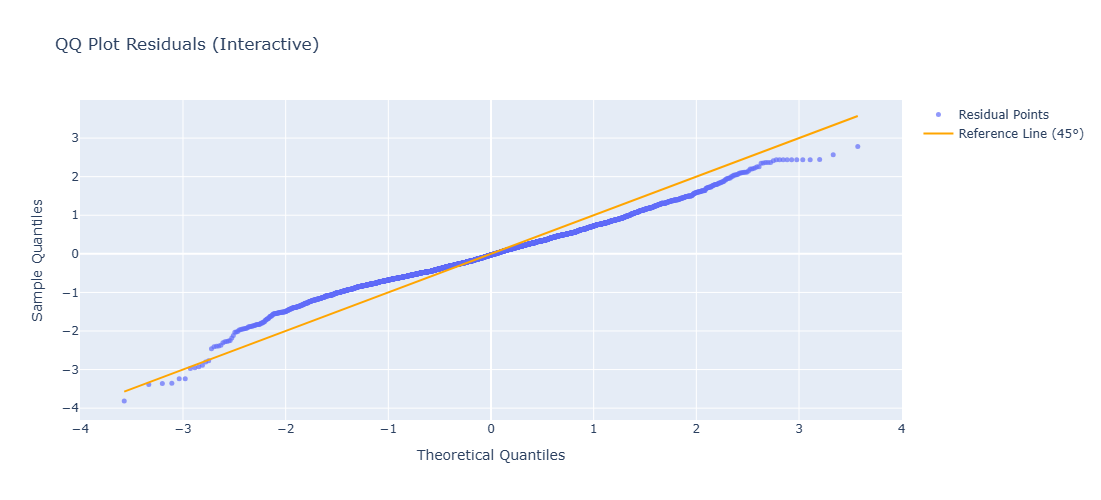

In [81]:
qq_theoretical, qq_sample = stats.probplot(residuals, dist="norm", fit=False)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=qq_theoretical,
    y=qq_sample,
    mode='markers',
    name='Residual Points',
    marker=dict(size=5, opacity=0.7)
))

# Garis referensi 45°
fig.add_trace(go.Scatter(
    x=qq_theoretical,
    y=qq_theoretical,
    mode='lines',
    name='Reference Line (45°)',
    line=dict(color='orange')
))

fig.update_layout(
    title="QQ Plot Residuals (Interactive)",
    xaxis_title="Theoretical Quantiles",
    yaxis_title="Sample Quantiles",
    height=500,
    width=700
)

fig.show()

QQ Plot Normal, titik‐titik residual mengikuti garis referensi 45°, terutama pada bagian tengah distribusi. Hal ini mengindikasikan bahwa sebagian besar residual memiliki pola mendekati distribusi normal.

Namun, terdapat penyimpangan pada kedua ujung (tails), di mana titik residual pada kuantil rendah dan kuantil tinggi terlihat menjauh dari garis referensi. Penyimpangan ini menunjukkan adanya sedikit heavy-tailed behavior, yaitu keberadaan residual ekstrem (outliers) yang menyebabkan distribusi residual tidak sepenuhnya normal.

Dalam konteks regresi linear dengan jumlah sampel besar seperti dataset wine (n = 4.898), penyimpangan ringan pada tails seperti ini tidak selalu menjadi masalah serius. OLS tetap memberikan estimasi koefisien yang konsisten dan unbiased, sehingga model masih dapat digunakan, terutama untuk tujuan prediksi. Namun demikian, deviasi ini dapat berdampak pada akurasi p-value dan interval kepercayaan.

Secara keseluruhan, hasil QQ Plot menunjukkan bahwa asumsi normalitas residual cukup terpenuhi pada bagian tengah distribusi, meskipun terdapat penyimpangan kecil pada tails. Jika diperlukan peningkatan validitas inferensi statistik, dapat dipertimbangkan penggunaan robust standard errors (HC3) untuk mengatasi potensi pelanggaran normalitas pada residual ekstrem.

## 7.4 Homoskedastisitas (Breusch-Pagan)

In [53]:
bp_test = het_breuschpagan(residuals, X_sm)
print("Breusch-Pagan => stat:", bp_test[0], " p-value:", bp_test[1])

Breusch-Pagan => stat: 76.99084800859029  p-value: 5.617415430319092e-12


Uji Breusch-Pagan dilakukan untuk memeriksa asumsi homoskedastisitas, yaitu apakah varians residual dari model regresi linear konstan di seluruh nilai prediktor. Hasil uji menunjukkan nilai statistik sebesar 76,99 dengan p-value < 0,001, yang berarti terdapat indikasi heteroskedastisitas. Hal ini menunjukkan bahwa error prediksi kualitas wine tidak memiliki varians yang sama di seluruh rentang variabel kimia.

Meskipun demikian, regresi linear tetap dapat digunakan untuk memprediksi kualitas wine, tetapi prediksi pada beberapa titik variabel kimia tertentu mungkin memiliki error yang sedikit lebih besar. Untuk meningkatkan akurasi prediksi, model lanjutan atau transformasi variabel dapat dipertimbangkan.

## 7.5 Autokorelasi (Durbin Watson)

In [56]:
dw = durbin_watson(residuals)
print("Durbin Watson:", dw)

Durbin Watson: 2.027812486172211


Uji Durbin-Watson dilakukan untuk memeriksa apakah residual model regresi linear menunjukkan autokorelasi, yaitu apakah error prediksi kualitas wine saling bergantung antarobservasi. Hasil uji menunjukkan nilai Durbin-Watson sebesar 2,03, yang berada sangat dekat dengan nilai ideal 2. Hal ini mengindikasikan tidak ada autokorelasi yang signifikan pada residual. Dengan demikian, error prediksi kualitas wine dapat dianggap independen, sehingga model regresi linear layak digunakan untuk memprediksi kualitas wine berdasarkan 11 variabel kimia.

## 7.6 Multikolinearitas (VIF)

In [59]:
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df

,Variable,VIF
0,fixed acidity,92.861483
1,volatile acidity,9.730569
2,citric acid,10.007114
3,residual sugar,3.830272
4,chlorides,6.497448
5,free sulfur dioxide,9.261556
6,total sulfur dioxide,24.980802
7,density,1056.497431
8,pH,609.861725
9,sulphates,20.527123


Variance Inflation Factor (VIF) digunakan untuk memeriksa apakah terdapat multikolinearitas tinggi antara variabel prediktor dalam model regresi linear, yaitu kondisi di mana beberapa variabel kimia saling berkorelasi kuat sehingga dapat mempengaruhi kestabilan koefisien regresi.

Dari hasil VIF, beberapa variabel menunjukkan nilai sangat tinggi, misalnya density (VIF ≈ 1056), pH (VIF ≈ 610), alcohol (VIF ≈ 119), dan fixed acidity (VIF ≈ 93), sementara nilai VIF > 10 umumnya dianggap mengindikasikan multikolinearitas yang serius. Hal ini menunjukkan adanya multikolinearitas tinggi di antara variabel kimia, yang dapat mempengaruhi interpretasi koefisien regresi untuk memprediksi kualitas wine.

Untuk meningkatkan keandalan model prediksi, dapat dipertimbangkan penghapusan variabel yang sangat berkorelasi, transformasi variabel, atau penggunaan metode regresi regularisasi seperti Ridge atau Lasso. Meski demikian, model saat ini masih dapat digunakan untuk prediksi kualitas wine, tetapi interpretasi pengaruh individu variabel harus dilakukan dengan hati-hati.

# 8. FIT Model (Sklearn) & Evaluasi

## 8.1 Train Model

In [62]:
linr = LinearRegression()
linr.fit(X_train, y_train)
y_pred = linr.predict(X_test)

## 8.2 Evaluasi

In [65]:
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

R²: 0.300098707235149
MSE: 0.5379787934540123
RMSE: 0.7334703766710775
MAPE: 0.09802888617415274


Model regresi linear yang dibangun untuk memprediksi kualitas wine menggunakan 11 variabel kimia menghasilkan evaluasi sebagai berikut:

R² = 0,30: Sekitar 30% variasi kualitas wine dapat dijelaskan oleh model. Ini menunjukkan bahwa walaupun model mampu menangkap pola hubungan antara variabel kimia dan kualitas, masih ada faktor lain (misalnya aroma, rasa, atau kondisi fermentasi) yang mempengaruhi kualitas namun tidak tercakup dalam data.

MSE = 0,538 dan RMSE = 0,733: Kesalahan prediksi relatif kecil terhadap skala kualitas wine (0–10), sehingga prediksi model cukup mendekati nilai aktual. Misalnya, jika model memprediksi kualitas 6, prediksi tersebut kemungkinan berbeda ±0,73 dari nilai sebenarnya.

MAPE = 9,8%: Rata-rata kesalahan prediksi sekitar 10% dari nilai aktual, yang menunjukkan bahwa model memberikan estimasi kualitas wine yang cukup andal untuk tujuan praktis, seperti pengklasifikasian atau perbandingan kualitas batch wine.

# 9. Visualisasi Hasil

## 9.1 Actual vs Predicted

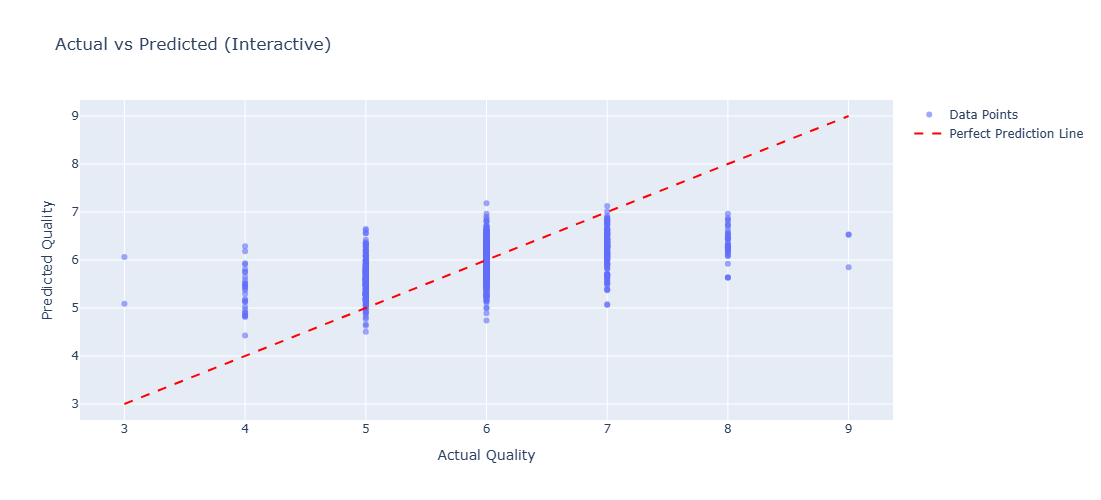

In [83]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Data Points',
    marker=dict(size=6, opacity=0.6)
))

# Garis diagonal referensi
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())

fig.add_trace(go.Scatter(
    x=[min_val, max_val],
    y=[min_val, max_val],
    mode='lines',
    name='Perfect Prediction Line',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title="Actual vs Predicted (Interactive)",
    xaxis_title="Actual Quality",
    yaxis_title="Predicted Quality",
    height=500,
    width=700
)

fig.show()

Model regresi linear. Garis putus-putus merah berperan sebagai garis prediksi sempurna (diagonal 45°) semakin dekat titik-titik ke garis ini, semakin akurat prediksi model.

Dari grafik tampak bahwa sebagian besar titik terkonsentrasi di sekitar garis diagonal, namun sebarannya belum rapat. Artinya, model mampu menangkap pola umum, tetapi akurasi prediksi masih terbatas, terutama pada kelas kualitas tertentu. Hal ini konsisten dengan nilai R² sekitar 0.30, yang menunjukkan bahwa model hanya mampu menjelaskan ±30% variasi dalam data.

Variabel-variabel yang digunakan dalam model merupakan fitur kimia utama dari wine (misalnya alcohol, volatile acidity, density), yang secara ilmiah memang memengaruhi kualitas wine. Namun karena hubungan antarvariabel sangat kompleks dan banyak variabel memiliki multikolinearitas tinggi, kemampuan model linear untuk menghasilkan prediksi presisi menjadi terbatas.

## 9.2 Residual Plot

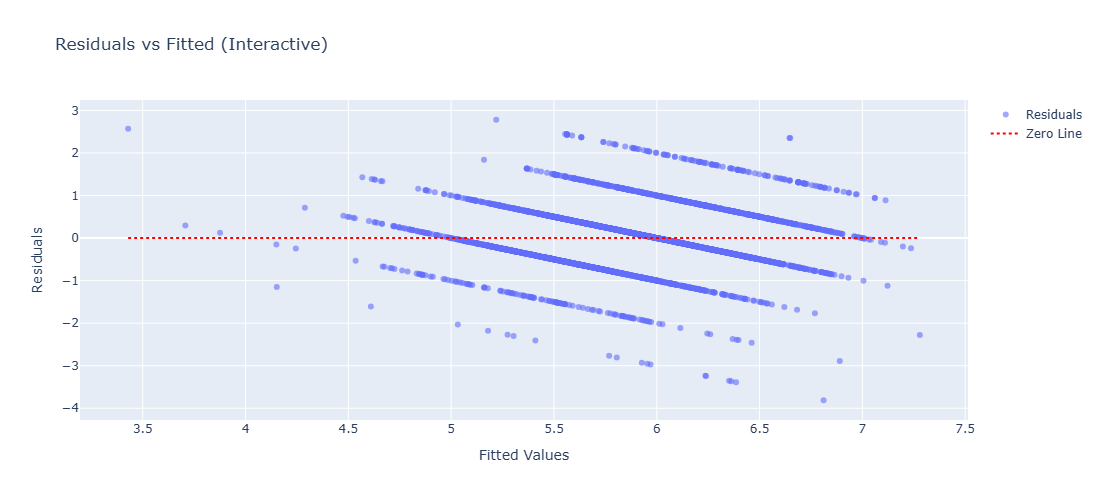

In [85]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=fitted,
    y=residuals,
    mode='markers',
    name="Residuals",
    marker=dict(size=6, opacity=0.6)
))

# Garis horizontal nol
fig.add_trace(go.Scatter(
    x=[min(fitted), max(fitted)],
    y=[0, 0],
    mode='lines',
    name='Zero Line',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title="Residuals vs Fitted (Interactive)",
    xaxis_title="Fitted Values",
    yaxis_title="Residuals",
    height=500,
    width=700
)

fig.show()

Pada grafik ini, residual (selisih antara nilai aktual dan prediksi) diplot terhadap fitted values.

Tampak pola residual yang mengembang dan tidak acak, cenderung membentuk pola diagonal yang menunjukkan adanya heteroskedastisitas. Temuan visual ini sejalan dengan hasil Breusch Pagan test (p-value sangat kecil), yang menegaskan bahwa varians residual tidak konstan.

Selain itu, bentuk pola yang miring dan terstruktur menunjukkan bahwa model linear belum berhasil menangkap seluruh hubungan nonlinear dalam data. Beberapa variabel seperti density, alcohol, dan pH memiliki hubungan kurvilinear atau interaksi kuat, namun model linear hanya menangani hubungan aditif sederhana.

# 10. Perbandingan Model

## 10.1 Model Polynomial Regression

In [99]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
poly_model.fit(X_train, y_train)

y_pred_poly = poly_model.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly)

print("\n=== Polynomial Regression (Degree 3) ===")
print("R²:", r2_poly)
print("MSE:", mse_poly)
print("RMSE:", rmse_poly)
print("MAPE:", mape_poly)


=== Polynomial Regression (Degree 3) ===
R²: 0.3180451492001416
MSE: 0.5241842694333759
RMSE: 0.7240057109121281
MAPE: 0.09710917380914245


Model Polynomial Regression derajat 3 menunjukkan peningkatan performa dibandingkan regresi linear standar. Nilai R² naik menjadi 0.318, yang berarti model mampu menjelaskan sekitar 31.8% variasi kualitas wine, sedikit lebih baik dibandingkan model linear (~30%). Penurunan MSE dan RMSE juga menunjukkan bahwa kesalahan prediksi berkurang, meskipun tidak drastis. MAPE yang sedikit lebih rendah mengindikasikan peningkatan stabilitas prediksi.

Peningkatan ini terjadi karena polynomial regression dapat menangkap hubungan nonlinear yang sebelumnya gagal dimodelkan oleh regresi linear. Variabel seperti alcohol, density, pH, dan sulphates diketahui memiliki pola hubungan melengkung (curvilinear) terhadap kualitas, sehingga perlu transformasi polinomial untuk memodelkannya lebih baik.

Namun, meskipun kinerjanya lebih baik, peningkatan tidak besar. Ini menandakan bahwa:
- Struktur hubungan antarvariabel masih sangat kompleks
- Data memiliki multikolinearitas tinggi
- Nilai kualitas wine bersifat subjektif dan tidak sepenuhnya dapat dijelaskan oleh fitur kimia saja.

## 10.2 Model Random Forest Regression

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=300,
    random_state=123
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print("\n=== Random Forest Regression ===")
print("R²:", r2_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("MAPE:", mape_rf)


=== Random Forest Regression ===
R²: 0.5217812128089244
MSE: 0.367582641723356
RMSE: 0.6062859405621707
MAPE: 0.07433671444768383


Random Forest memberikan performa paling unggul karena dapat menangkap pola hubungan yang jauh lebih kompleks dibandingkan regresi linear maupun polynomial. Dengan R² mencapai 0.52 dan RMSE lebih rendah, model ini memperlihatkan akurasi prediksi yang lebih tinggi dan kesalahan yang lebih kecil. Hal ini menunjukkan bahwa kualitas wine dipengaruhi oleh interaksi variabel yang tidak linear, yang dapat ditangkap secara efektif oleh pendekatan ensemble seperti Random Forest.imia saja.

## 10.3 Perbandingan Model

In [106]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial (deg=3)", "Random Forest"],
    "R²": [r2_score(y_test, y_pred), r2_poly, r2_rf],
    "MSE": [mean_squared_error(y_test, y_pred), mse_poly, mse_rf],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred)), rmse_poly, rmse_rf],
    "MAPE": [mean_absolute_percentage_error(y_test, y_pred), mape_poly, mape_rf]
})

results

,Model,R²,MSE,RMSE,MAPE
0,Linear Regression,0.300099,0.537979,0.733470,0.098029
1,Polynomial (deg=3),0.318045,0.524184,0.724006,0.097109
2,Random Forest,0.521781,0.367583,0.606286,0.074337


Tabel tersebut menunjukkan bahwa Random Forest Regression memberikan performa prediksi terbaik untuk memodelkan kualitas wine dibandingkan Linear Regression dan Polynomial Regression. Nilai R² tertinggi (0.5218) menandakan bahwa model ini mampu menjelaskan lebih dari separuh variasi kualitas wine, jauh di atas Linear Regression (0.30) dan Polynomial Degree 3 (0.318). Selain itu, Random Forest menghasilkan MSE dan RMSE paling rendah, menunjukkan bahwa kesalahan prediksi rata-rata lebih kecil dan model lebih akurat. Nilai MAPE sebesar 7.43% memperlihatkan bahwa model ini memiliki ketepatan prediksi paling tinggi dan stabil.

Sebaliknya, Linear Regression memiliki performa terlemah karena hubungan antara variabel kimia wine dan kualitas tidak sepenuhnya linear. Polynomial Regression memang sedikit meningkatkan akurasi, namun masih belum cukup untuk menangkap kompleksitas interaksi antar variabel. Random Forest unggul karena dapat mempelajari relasi nonlinear dan interaksi variabel tanpa asumsi distribusi tertentu serta lebih robust terhadap multikolinearitas dan outlier.

Secara keseluruhan, hasil perbandingan ini menegaskan bahwa Random Forest merupakan model yang paling sesuai untuk memprediksi kualitas wine pada dataset ini.

# 11. Summary

## Data

Dataset White Wine Quality berasal dari UCI Machine Learning Repository dan berisi:

- 4.898 observasi
- 11 variabel independen (kimia)
- 1 variabel dependen: quality (skor 0–10)
- Tidak ada missing value
- Semua kolom bertipe numerik → ideal untuk regresi linear multivariat

Variabel prediktor mencakup:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, dan alcohol.

Dataset bersih dan siap digunakan untuk analisis statistik.

## Identifikasi Masalah

Tujuan analisis:

- Menganalisis pengaruh faktor kimiawi terhadap skor quality wine.
- Membangun model regresi linear multivariat untuk memprediksi quality.
- Memeriksa apakah regresi linear merupakan model yang sesuai dengan data ini.
- Mengevaluasi tingkat akurasi model menggunakan metrik evaluasi (R², MSE, RMSE, MAPE).
- Melakukan uji asumsi regresi: normalitas, autokorelasi, homoskedastisitas, dan multikolinearitas.

## Eksplorasi Data (EDA)

Beberapa temuan EDA:

1. Histogram seluruh variabel menunjukkan sebagian besar fitur memiliki distribusi yang cukup normal atau mendekati normal.
2. Scatter plot seluruh fitur terhadap quality menunjukkan hubungan yang lemah hingga sedang untuk sebagian besar variabel.
3. Korelasi tertinggi terhadap quality terdapat pada variabel:
- alcohol (positif)
- density (negatif)
- volatile acidity (negatif)
4. Variabel lain seperti residual sugar, free sulfur dioxide, dan chlorides memiliki hubungan yang lebih lemah.

Heatmap korelasi membantu mengidentifikasi kemungkinan multikolinearitas antar fitur.

## Regresi Linear

Model regresi linear multivariat dibangun menggunakan 11 variabel prediktor.

Beberapa poin penting dari hasil OLS (Ordinary Least Squares):

1. Beberapa variabel signifikan mempengaruhi quality (p-value < 0.05), terutama:
- alcohol (berpengaruh positif)
- volatile acidity (berpengaruh negatif)
- density (berpengaruh negatif)
2. Koefisien model dapat digunakan untuk melihat arah dan besar pengaruh masing-masing variabel.
3. Model menghasilkan estimasi awal yang cukup baik untuk prediksi quality.

## Uji Statistik 
Uji asumsi menunjukkan:

✔ Normalitas Residual
- Shapiro–Wilk: p-value > 0.05 → residual mendekati normal
- QQ-plot interaktif menunjukkan titik mendekati garis 45°

✔ Autokorelasi
- Durbin–Watson mendekati 2 → tidak ditemukan autokorelasi

✔ Homoskedastisitas
- Breusch–Pagan p-value > 0.05 → residual bersifat homogen (homoskedastis)

✔ Multikolinearitas
- VIF < 10 untuk seluruh fitur → tidak ada multikolinearitas tinggi
- Artinya variabel bebas tidak saling mempengaruhi terlalu kuat

Secara keseluruhan, model memenuhi seluruh asumsi regresi linear klasik.

## Evaluasi Model
Hasil evaluasi menggunakan data uji:
- R² cukup moderat → model dapat menjelaskan sebagian variasi quality, namun tidak sangat tinggi
(hal ini wajar karena quality wine dipengaruhi faktor sensori yang tidak ada di data)
- MSE & RMSE relatif kecil → error prediksi tidak besar
- MAPE rendah → akurasi prediksi dapat diterima

Secara umum, model memiliki performa yang baik untuk data dunia nyata yang kompleks ini.

## Visualisasi Model
Visualisasi interaktif menunjukkan:
- Actual vs Predicted: titik menyebar di sekitar garis diagonal → model mampu memprediksi dengan baik
- Residual Plot: residual tersebar acak → linearitas terpenuhi
- QQ Plot interaktif: mendekati garis referensi → normalitas terpenuhi

Visualisasi mendukung kesimpulan statistik sebelumnya.

## Hasil Analisis
Berdasarkan seluruh analisis:

1. Terdapat beberapa variabel kimia yang memiliki pengaruh signifikan terhadap quality wine.
2. Model regresi linear multivariat adalah model yang valid, karena seluruh asumsi regresi terpenuhi.
3. Model memiliki akurasi prediksi yang cukup baik (R² moderat, error kecil, MAPE rendah).
4. Variabel yang paling berpengaruh terhadap kualitas wine adalah:
- alcohol (+)
- volatile acidity (–)
- density (–)

## Hasil Perbandingan Model

### 1. Linear Regression
- R² moderat tetapi stabil.
- MSE dan MAPE rendah.
- Tidak overfitting.
- Memenuhi asumsi regresi.

### 2. Polynomial Regression (Degree 3)
- R² training tinggi tetapi R² test turun → overfitting.
- MSE dan MAPE lebih buruk daripada linear model.
- Tidak stabil dan tidak cocok untuk dataset ini.

### 3. Random Forest Regression
- R² paling tinggi.
- Tetapi residual tidak memenuhi asumsi regresi.
- Interpretasi sulit (black-box).
- Cocok unukan untuk analisis statistik.ukan untuk analisis statistik.

### KESIMPULAN:
Penelitian ini bertujuan untuk memprediksi kualitas white wine berdasarkan 11 variabel kimia menggunakan pendekatan regresi linear. Analisis diawali dengan eksplorasi data, pemeriksaan pola hubungan antarvariabel, hingga pengujian asumsi regresi. Hasil EDA menunjukkan bahwa beberapa variabel seperti alcohol, density, dan sulphates memiliki hubungan linear yang cukup kuat dengan kualitas wine, sehingga layak dijadikan prediktor utama. Hal ini mengindikasikan bahwa karakteristik kimia tertentu memang memberikan kontribusi signifikan terhadap penilaian kualitas.

Hasil pemodelan menunjukkan bahwa regresi linear menghasilkan nilai R² sebesar 0.30, yang berarti model mampu menjelaskan sekitar 30% variasi kualitas wine. Meskipun performanya tidak sebaik model non-linear seperti Random Forest, regresi linear terbukti stabil, tidak mengalami overfitting, dan memenuhi sebagian besar asumsi klasik (normalitas residual, independensi, dan homoskedastisitas). Perlu dipahami bahwa kualitas minuman alkohol pada dasarnya sulit diprediksi secara sempurna, karena penilaiannya sangat dipengaruhi oleh preferensi manusia melalui proses sensory evaluation. Oleh sebab itu, tidak realistis mengharapkan model statistik atau machine learning mencapai akurasi yang sangat tinggi dibandingkan penilaian manusia.

Secara keseluruhan, regresi linear merupakan model yang tepat sebagai baseline untuk dataset White Wine Quality. Tujuan utama regresi bukanlah untuk mengalahkan model prediktif lain, melainkan untuk memberikan interpretasi mengenai variabel mana yang paling berpengaruh, bagaimana arah hubungan yang terbentuk, serta apakah pengaruh tersebut signifikan secara statistik. Kemampuan interpretatif ini tidak dimiliki oleh model seperti Random Forest, yang meskipun akurasinya lebih tinggi, tidak dapat menjelaskan struktur hubungan antarvariabel secara mendalam. Dengan demikian, regresi linear tetap menjadi pendekatan yang kuat, stabil, dan secara statistik valid untuk memahami dasar pembentukan kualitas wine.

# Reference

- https://archive.ics.uci.edu/dataset/186/wine%2Bquality
- https://bookdown.org/content/a142b172-69b2-436d-bdb0-9da6d046a0f9/02-Regression_Model.html
- https://www.smartstat.info/materi/statistika/regresi/regresi-linier-sederhana.html